In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
pima = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_logistic_reg.csv",)
pima.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender,species
0,39.1,18.7,181,3750,male,Adelie
1,39.5,17.4,186,3800,female,Adelie
2,40.3,18.0,195,3250,female,Adelie
3,41.5,20.0,186,3450,NaN,Adelie
4,36.7,19.3,193,3450,female,Adelie


In [3]:
print(pima.columns)


Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'Gender', 'species'],
      dtype='object')


In [4]:
pima= pima.drop(["Gender"],axis = 1)

In [5]:
pima.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181,3750,Adelie
1,39.5,17.4,186,3800,Adelie
2,40.3,18.0,195,3250,Adelie
3,41.5,20.0,186,3450,Adelie
4,36.7,19.3,193,3450,Adelie


In [6]:
pima.tail()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
271,45.5,14.0,215,5020,Gentoo
272,46.8,14.3,215,4850,Gentoo
273,50.4,15.7,222,5750,Gentoo
274,45.2,14.8,212,5200,Gentoo
275,49.9,16.1,213,5400,Gentoo


In [7]:
#One-Hot Encoding
# Sample DataFrame
# Apply one-hot encoding
#pima_encoded = pd.get_dummies(pima, columns=['species'], prefix='species')
#print(pima_encoded)


In [8]:
#Manual Mapping (using replace or map methods)
# Sample DataFrame
# Using replace
# replace
pima['Species_numeric_replace'] = pima['species'].replace({'Adelie': 0, 'Gentoo': 1})

# map
pima['Species_numeric_map'] = pima['species'].map({'Adelie': 0, 'Gentoo': 1})

print(pima)


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0              39.1           18.7                181         3750  Adelie   
1              39.5           17.4                186         3800  Adelie   
2              40.3           18.0                195         3250  Adelie   
3              41.5           20.0                186         3450  Adelie   
4              36.7           19.3                193         3450  Adelie   
..              ...            ...                ...          ...     ...   
271            45.5           14.0                215         5020  Gentoo   
272            46.8           14.3                215         4850  Gentoo   
273            50.4           15.7                222         5750  Gentoo   
274            45.2           14.8                212         5200  Gentoo   
275            49.9           16.1                213         5400  Gentoo   

     Species_numeric_replace  Species_numeric_map  
0          

C:\Users\ONEEKA\AppData\Local\Temp\ipykernel_2372\4284495246.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pima['Species_numeric_replace'] = pima['species'].replace({'Adelie': 0, 'Gentoo': 1})


In [9]:
pima.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,Species_numeric_replace,Species_numeric_map
0,39.1,18.7,181,3750,Adelie,0,0
1,39.5,17.4,186,3800,Adelie,0,0
2,40.3,18.0,195,3250,Adelie,0,0
3,41.5,20.0,186,3450,Adelie,0,0
4,36.7,19.3,193,3450,Adelie,0,0


In [10]:
pima= pima.sample(frac=1, random_state=2).reset_index(drop=True)

print(pima.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0            48.7           14.1                210         4450  Gentoo   
1            39.2           19.6                195         4675  Adelie   
2            43.2           18.5                192         4100  Adelie   
3            38.6           21.2                191         3800  Adelie   
4            39.7           17.7                193         3200  Adelie   

   Species_numeric_replace  Species_numeric_map  
0                        1                    1  
1                        0                    0  
2                        0                    0  
3                        0                    0  
4                        0                    0  


In [11]:
#split dataset in features and target variable
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]
X = pima[feature_cols] # Features
y = pima.Species_numeric_map # Target variable

In [12]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
print(X_test)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
184            49.5           16.2                229         5800
15             41.5           20.0                186         3450
55             34.5           18.1                187         2900
74             47.3           13.8                216         4725
188            38.7           19.0                195         3450
..              ...            ...                ...          ...
176            46.2           14.1                217         4375
204            36.3           19.5                190         3800
271            42.8           18.5                195         4250
76             36.4           17.1                184         2850
44             47.4           14.6                212         4725

[69 rows x 4 columns]


In [14]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

In [15]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[39,  1],
       [ 0, 29]], dtype=int64)

([<matplotlib.axis.YTick at 0x1efcffffbc0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

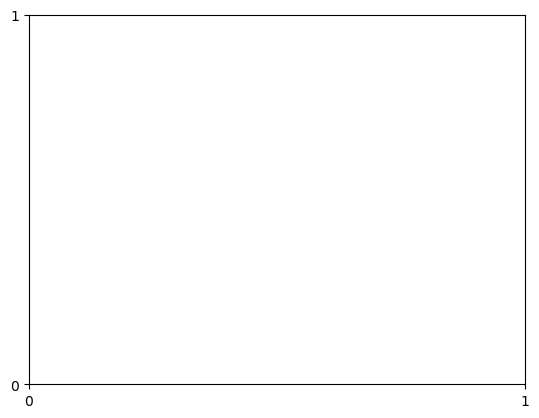

In [16]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

<Axes: >

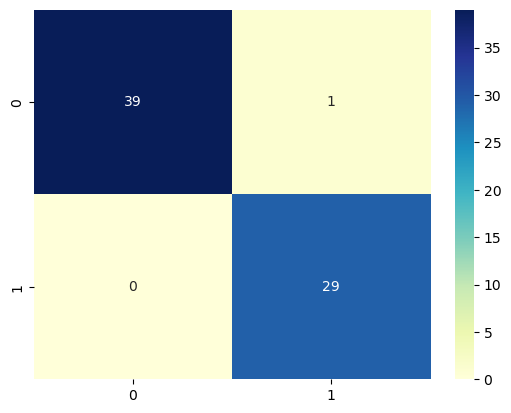

In [17]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [18]:
ax.xaxis.set_label_position("top")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

Accuracy: 0.9855072463768116
Precision: 0.9666666666666667
Recall: 1.0


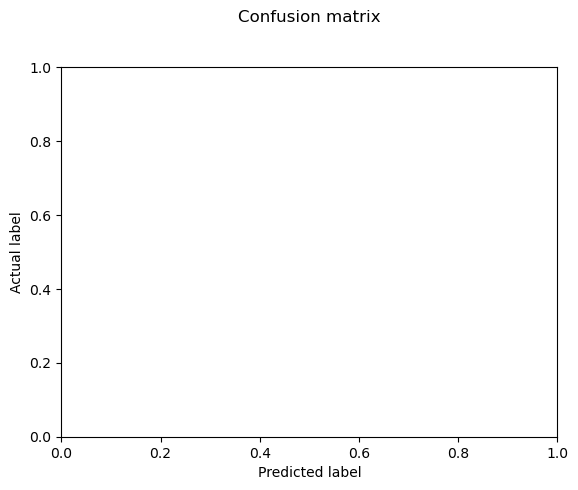

In [19]:
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

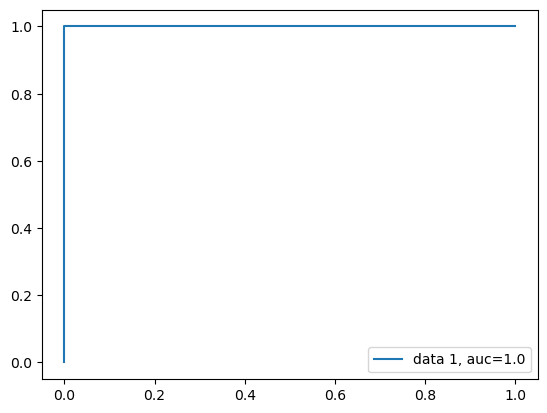

In [20]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()